In [125]:
#From ALY 6020-Module 1 Project- Understanding Income Inequality
#Aytaj Khankishiyeva
# Importing libraries
import bamboolib as bam
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [127]:
#Read the dataset
df=pd.read_csv('Desktop/adult-all.csv')

In [128]:
#View the dataset
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [129]:
# to understand the type of varaible in the datasets
df.dtypes

39                int64
State-gov        object
77516             int64
Bachelors        object
13                int64
Never-married    object
Adm-clerical     object
Not-in-family    object
White            object
Male             object
2174              int64
0                 int64
40                int64
United-States    object
<=50K            object
dtype: object

In [130]:
#Summary of dataset
print("Summary Statistics: \n", df.describe())

Summary Statistics: 
                  39         77516            13          2174             0  \
count  48841.000000  4.884100e+04  48841.000000  48841.000000  48841.000000   
mean      38.643578  1.896664e+05     10.078029   1079.045208     87.504105   
std       13.710650  1.056039e+05      2.570965   7452.093700    403.008483   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.781470e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.376460e+05     12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06     16.000000  99999.000000   4356.000000   

                 40  
count  48841.000000  
mean      40.422391  
std       12.391571  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [131]:
# to identify the null values in the dataset
df.isnull().sum()

39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64

In [132]:
# to identify the if there are any special charecters in the dataset
for col in df:
    print ('\nFrequency of variables %s'%col)
    print (df[col].unique())


Frequency of variables 39
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Frequency of variables State-gov
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Frequency of variables 77516
[ 83311 215646 234721 ... 173449  89686 350977]

Frequency of variables Bachelors
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Frequency of variables 13
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Frequency of variables Never-married
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

Frequency of variables Adm-clerical
['Exec-managerial' 'Handlers-cleaners' 'Pr

In [133]:
# Remove abnormals from State-gov column
df.drop(df.loc[df['State-gov']=='?'].index, inplace=True)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [134]:
# Remove abnormals from Adm-clerical column
df.drop(df.loc[df['Adm-clerical']=='?'].index, inplace=True)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [135]:
# Remove abnormals from United-States column
df.drop(df.loc[df['United-States']=='?'].index, inplace=True)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [136]:
# Dropping '2174', '0' because >50% of data contains zero.
df = df.drop(columns=['2174'])
df = df.drop(columns=['0'])

df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K


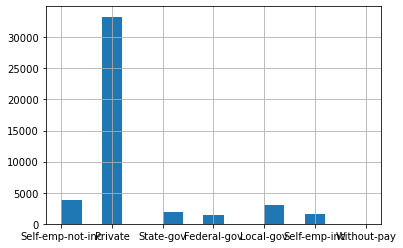

In [88]:
#Descriptive Statistics
df["State-gov"].hist(bins=15)
#Histogram of State-gov variable
plt.show()

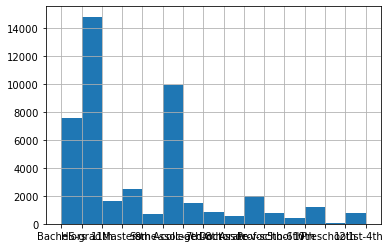

In [89]:
#Histogram of Bachelors variable
df["Bachelors"].hist(bins=15)
plt.show()

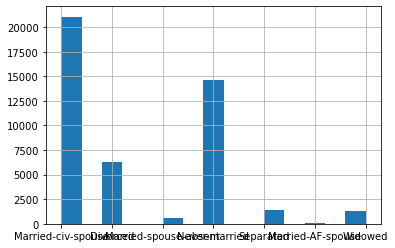

In [90]:
#Histogram of Never-married variable
df["Never-married"].hist(bins=15)
plt.show()

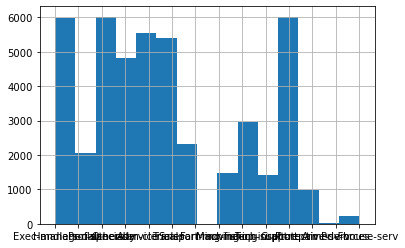

In [91]:
#Histogram of Adm-clerical variable
df["Adm-clerical"].hist(bins=15)
plt.show()

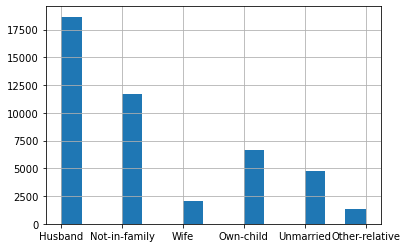

In [92]:
#Histogram of Not-in-family variable
df["Not-in-family"].hist(bins=15)
plt.show()

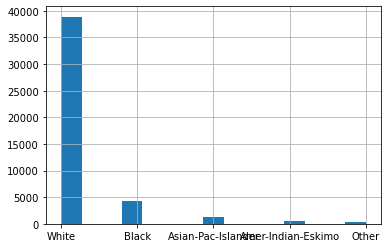

In [93]:
#Histogram of White variable
df["White"].hist(bins=15)
plt.show()

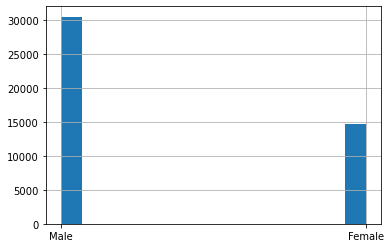

In [94]:
#Histogram of Male variable
df["Male"].hist(bins=15)
plt.show()

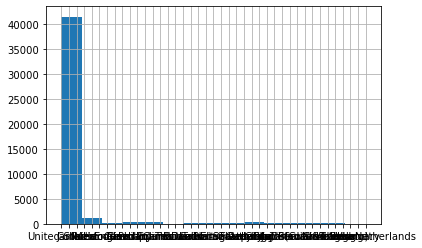

In [95]:
#Histogram of United-States variable
df["United-States"].hist(bins=15)
plt.show() 

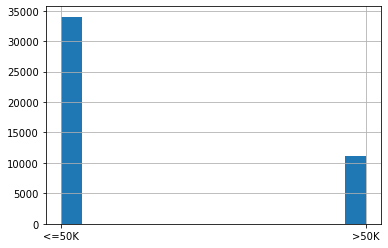

In [152]:
#Histogram of <=50K variable
df["<=50K"].hist(bins=15)
plt.show()

In [209]:
#Importing requierd libraries for data preprocessing and model building
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [210]:
#Encoding categorical variables
obj_att = df.dtypes[df.dtypes == 'O'].index.values
le = LabelEncoder()

for i in obj_att:
    df[i] = le.fit_transform(df[i])

df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
0,50,4,83311,9,13,2,3,0,4,1,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,2,245211,9,13,4,9,3,4,1,40,38,0
48836,39,2,215419,9,13,0,9,1,4,0,36,38,0
48838,38,2,374983,9,13,2,9,0,4,1,50,38,0
48839,44,2,83891,9,13,0,0,3,1,1,40,38,0


In [216]:
#Splitting the data
x = df.drop(columns=['<=50K'])
y = df['<=50K']
    
print(x.shape)
print(y.shape)

(45221, 12)
(45221,)


In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(x):

    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

VARIANCE INFLATION FACTOR

In [218]:
vif_calc(x)

,variables,VIF
0,39,9.344351
1,State-gov,6.241175
2,77516,4.035546
3,Bachelors,9.373287
4,13,18.756498
5,Never-married,4.010070
6,Adm-clerical,3.210168
7,Not-in-family,2.611288
8,White,18.513677
9,Male,4.559361


In [219]:
#Standardizing the data
scaler = StandardScaler()

scaler.fit(x.drop(columns = ['13','White','40','United-States']))
x_scal = scaler.transform(x.drop(columns = ['13','White','40','United-States']))
x = pd.DataFrame(x_scal, columns=x.drop(columns = ['13','White','40','United-States']).columns)
x

,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male
0,0.866408,1.874217,-1.007463,-0.344078,-0.389984,-0.737576,-0.884475,0.693825
1,-0.041454,-0.213396,0.245260,0.179892,-1.722923,-0.240842,-0.258390,0.693825
2,1.093373,-0.213396,0.425830,-2.439960,-0.389984,-0.240842,-0.884475,0.693825
3,-0.798005,-0.213396,1.407372,-0.344078,-0.389984,0.752625,2.245953,-1.441286
4,-0.117109,-0.213396,0.897829,0.441877,-0.389984,-0.737576,2.245953,-1.441286
...,...,...,...,...,...,...,...,...
45216,-0.419730,-0.213396,0.525132,-0.344078,0.942956,0.752625,0.993782,0.693825
45217,0.034201,-0.213396,0.243112,-0.344078,-1.722923,0.752625,-0.258390,-1.441286
45218,-0.041454,-0.213396,1.753592,-0.344078,-0.389984,0.752625,-0.884475,0.693825
45219,0.412477,-0.213396,-1.001972,-0.344078,-1.722923,-1.482677,0.993782,0.693825


In [220]:
#handling imbalanced data in the target variable
from collections import Counter
from sklearn.datasets import make_classification
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

smote = SMOTE()

x_bal, y_bal = smote.fit_resample(x, y)

print(x_bal.shape)
print(y_bal.shape)

(68026, 8)
(68026,)


In [221]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, train_size=0.8, random_state=123)

LOGISTIC REGRESSION MODEL

In [222]:
#Logistic regression using statsmodel
import statsmodels.api as sm
log_m = sm.Logit(y_bal, x_bal)
log_f = log_m.fit()
print(log_f.summary())

Optimization terminated successfully.
         Current function value: 0.600276
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  <=50K   No. Observations:                68026
Model:                          Logit   Df Residuals:                    68018
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.1340
Time:                        21:00:39   Log-Likelihood:                -40834.
converged:                       True   LL-Null:                       -47152.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
39                0.5014      0.010     50.777      0.000       0.482       0.521
State-gov        -0.

In [223]:
import time
#Logistic regression
start = time.time()
log_reg = LogisticRegression(solver='liblinear', random_state=123)
model = log_reg.fit(x_train, y_train)
y_pred = model.predict(x_test) 
end = time.time()
print('Runtime: ', end-start)

Runtime:  0.11228513717651367


In [224]:
#Classification Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      6790
           1       0.68      0.78      0.73      6816

    accuracy                           0.71     13606
   macro avg       0.71      0.71      0.71     13606
weighted avg       0.71      0.71      0.71     13606

[[4334 2456]
 [1509 5307]]


In [225]:
#Feature Importance of Logistic Regression
#Coeffecients of All Attributes
importance_1 = model.coef_[0]

for n,i in enumerate(importance_1):
    print('Feature: ',x_test.columns[n], ' Score: ', i)

Feature:  39  Score:  0.5291012518339663
Feature:  State-gov  Score:  -0.04589171948875622
Feature:  77516  Score:  0.022173663180167707
Feature:  Bachelors  Score:  0.25917106147983693
Feature:  Never-married  Score:  -0.39914588633042186
Feature:  Adm-clerical  Score:  0.10694764463157944
Feature:  Not-in-family  Score:  -0.24794343034039235
Feature:  Male  Score:  0.3652113897030761


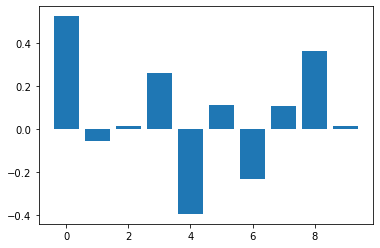

In [193]:
#Barplot of Coeffecients
plt.bar([x for x in range(len(importance_1))], importance_1)
plt.show()

RANDOM FOREST CLASSIFICATION

In [226]:
#Random Forest Classifier
start_1 = time.time() 
rfclass=RandomForestClassifier(n_estimators=20,random_state=123)
rfclass.fit(x_train,y_train)
rfypred=rfclass.predict(x_test)
end_1 = time.time()
print('Runtime: ', end_1-start_1)

Runtime:  0.9390671253204346


In [227]:
#Classifiaction Report
print(classification_report(y_test, rfypred))
print(confusion_matrix(y_test, rfypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6790
           1       0.87      0.88      0.87      6816

    accuracy                           0.87     13606
   macro avg       0.87      0.87      0.87     13606
weighted avg       0.87      0.87      0.87     13606

[[5881  909]
 [ 833 5983]]


Feature:  39  Score:  0.23252958694666437
Feature:  State-gov  Score:  0.035090693158292205
Feature:  77516  Score:  0.214990931061341
Feature:  Bachelors  Score:  0.12095213445001962
Feature:  Never-married  Score:  0.11164378953389734
Feature:  Adm-clerical  Score:  0.12123871823194628
Feature:  Not-in-family  Score:  0.1493058126123146
Feature:  Male  Score:  0.014248334005524669


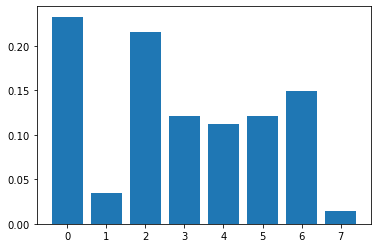

In [229]:
#Feature Importance of Random Forest
#Coeffecients of All Attributes
importance_rf = rfclass.feature_importances_

for n,i in enumerate(importance_rf):
    print('Feature: ',x_test.columns[n], ' Score: ', i)
    
#Barplot of Coeffecients
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()

DECISION TREE MODEL

In [230]:
#DecisionTree Classifier
start_2 = time.time()
treemodel = DecisionTreeClassifier(max_depth=3,random_state=123)
treemodel.fit(x_train,y_train)
y_pred_tree = treemodel.predict(x_test)
end_2 = time.time()
print('Runtime: ', end_2-start_2)

Runtime:  0.09654927253723145


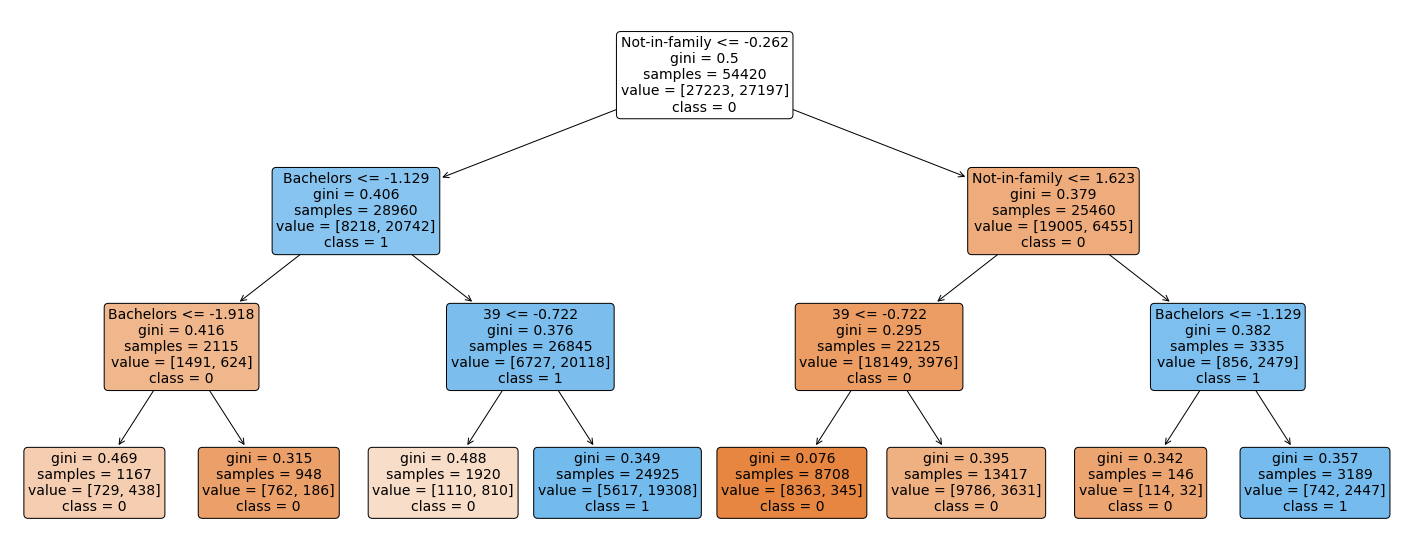

In [231]:
#Plot of decision tree levels
from sklearn import tree
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=x_test.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)

In [232]:
#Classifiaction Report
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6790
           1       0.78      0.80      0.79      6816

    accuracy                           0.78     13606
   macro avg       0.78      0.78      0.78     13606
weighted avg       0.78      0.78      0.78     13606

[[5233 1557]
 [1381 5435]]


GRADIENT BOOSTING

In [233]:
#Gradient Boosting Ensemble Method
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()
gbclass=GradientBoostingClassifier(random_state=0, learning_rate=0.2)
gbclass.fit(x_train,y_train)
gbypred=gbclass.predict(x_test)
print('speed:', time.time() - start_time)

speed: 4.09557318687439


In [234]:
#Classifiaction Report
print(classification_report(y_test, gbypred))
print(confusion_matrix(y_test, gbypred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6790
           1       0.84      0.89      0.86      6816

    accuracy                           0.86     13606
   macro avg       0.86      0.86      0.86     13606
weighted avg       0.86      0.86      0.86     13606

[[5600 1190]
 [ 741 6075]]


Feature:  39  Score:  0.15563794918970322
Feature:  State-gov  Score:  0.013562336314173518
Feature:  77516  Score:  0.0037708005574846213
Feature:  Bachelors  Score:  0.188559793993124
Feature:  Never-married  Score:  0.05461825940446137
Feature:  Adm-clerical  Score:  0.13400114713364292
Feature:  Not-in-family  Score:  0.44380694349479366
Feature:  Male  Score:  0.006042769912616739


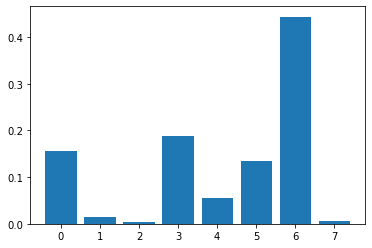

In [235]:
#Feature Importance of Gradient Boosting
#Coeffecients of All Attributes
importance_gb = gbclass.feature_importances_

for n,i in enumerate(importance_gb):
    print('Feature: ',x_test.columns[n], ' Score: ', i) 
    
#Barplot of Coeffecients
plt.bar([x for x in range(len(importance_gb))], importance_gb)
plt.show()

K-NEAREST CLASSIFICATION MODEL

In [237]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

knn = KNeighborsClassifier(n_neighbors=8)

In [238]:
knn.fit(x_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(x_test, y_test))

0.8273555784212847


In [239]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [240]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

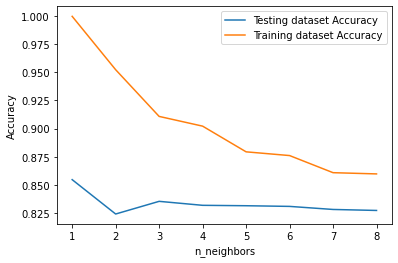

In [241]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

FINAL